# 10X scRNA-seq data Xenopus Laevis - Cell type composition analysis

March 13, 2020 Jonathan Fiorentino. 

We perform an analysis of cell type composition per condition (IVF/NT) first using a chi-square test, then using a generalised linear model. With the second approach we are able to give a statistical significance to the IVF/NT imbalance in each cell type.

Last update: 14/12/2020

In [1]:
%matplotlib inline

In [2]:
library(Seurat)
library(ggplot2)
library(cowplot)
library(repr)

options(repr.plot.width=7,repr.plot.height=7)

#Load the data
xenopus.combined <- readRDS(file = "xenopus_combined_and_clustered_no_out.rds")

# Bar plots of cluster composition

Some general plots of cluster composition by condition and batch

In [3]:
sizes <- as.vector(table(Idents(xenopus.combined)))
isnt <- as.data.frame.matrix(table(Idents(xenopus.combined), xenopus.combined$isnt))
batch <- as.data.frame.matrix(table(Idents(xenopus.combined), xenopus.combined$stim))

In [4]:
%get sizes --from R
%get isnt --from R
%get batch --from R

Loading required package: feather



In [5]:
isnt

,IVF,NT
0,358,390
1,435,297
2,209,203
3,243,104
4,105,161
5,119,101
6,72,91
7,122,51
8,132,37
9,31,103


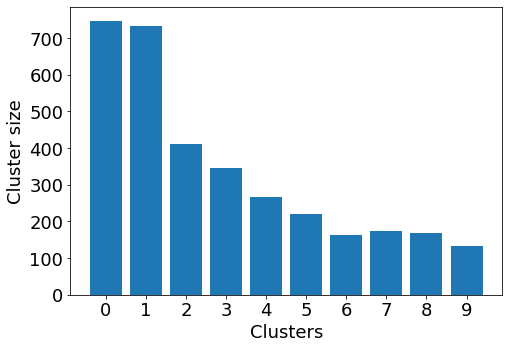

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib

matplotlib.rcParams.update({'font.size': 18})

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_xlabel('Clusters')
ax.set_ylabel('Cluster size')
clus = ['0','1','2','3','4','5','6','7','8','9']
ax.bar(clus,sizes)
plt.savefig('bar_clus_size.pdf',bbox_inches='tight')

In [7]:
isnt=isnt.div(isnt.sum(axis=0))
isnt=100*isnt.div(isnt.sum(axis=1),axis=0)

In [8]:
#Get Seurat colors of the conditions
p <- Seurat::DimPlot(xenopus.combined, reduction = "umap", 
                     group.by = "isnt")
 # Generate the tSNE plot, but save it as an object
pbuild <- ggplot2::ggplot_build(p) # Use ggplot_build to deconstruct the ggplot object
pdata <- pbuild$data[[1]] # Pull the data used for the plot
pdata <-  pdata[order(pdata$group), ] # Order the plot data by group
ucols <- unique(pdata$colour) # Get a vector of unique colors
names(ucols) <- unique(pdata$group) # Add the groups to the vector of colors as names

In [9]:
ucols

1         2 
"#F8766D" "#00BFC4"

<Figure size 432x288 with 0 Axes>

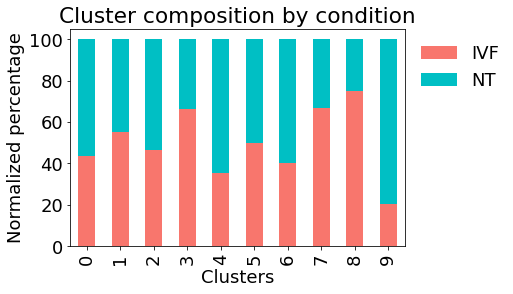

In [10]:
%get ucols --from R

fig = plt.figure()
ax=isnt.plot(kind='bar', stacked=True,
              color=ucols)
ax.legend(labels=['IVF', 'NT'],bbox_to_anchor=(1,1),frameon=False)
ax.set_xlabel('Clusters')
ax.set_ylabel('Normalized percentage')
ax.set_title('Cluster composition by condition')
plt.savefig('bar_clus_cond.pdf',bbox_inches='tight')

In [11]:
#Get Seurat colors of the conditions
p <- Seurat::DimPlot(xenopus.combined, reduction = "umap", 
                     group.by = "stim")
 # Generate the tSNE plot, but save it as an object
pbuild <- ggplot2::ggplot_build(p) # Use ggplot_build to deconstruct the ggplot object
pdata <- pbuild$data[[1]] # Pull the data used for the plot
pdata <-  pdata[order(pdata$group), ] # Order the plot data by group
ucols <- unique(pdata$colour) # Get a vector of unique colors
names(ucols) <- unique(pdata$group) # Add the groups to the vector of colors as names

In [12]:
batch=batch[['SIGAA2','SIGAH5','SIGAB2','SIGAH12']]
batch=batch.div(batch.sum(axis=0))
batch=100*batch.div(batch.sum(axis=1),axis=0)

<Figure size 432x288 with 0 Axes>

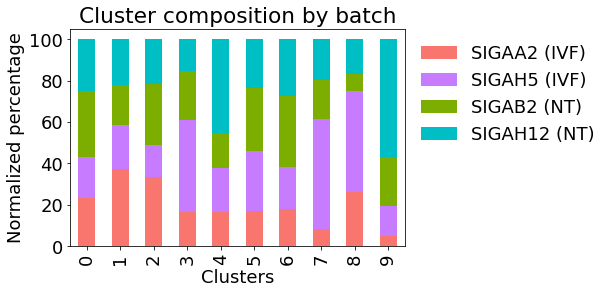

In [13]:
%get ucols --from R

fig = plt.figure()
ax=batch.plot(kind='bar', stacked=True,
              color=[ucols[0],ucols[3],ucols[1],ucols[2]])
ax.legend(labels=['SIGAA2 (IVF)', 'SIGAH5 (IVF)','SIGAB2 (NT)','SIGAH12 (NT)'],
          bbox_to_anchor=(1,1),frameon=False)
ax.set_xlabel('Clusters')
ax.set_ylabel('Normalized percentage')
ax.set_title('Cluster composition by batch')
plt.savefig('bar_clus_batch.pdf',bbox_inches='tight')

In [14]:
isnt

,IVF,NT
0,43.603771,56.396229
1,55.230024,44.769976
2,46.443102,53.556898
3,66.307453,33.692547
4,35.455216,64.544784
5,49.808953,50.191047
6,39.991044,60.008956
7,66.830981,33.169019
8,75.030490,24.969510
9,20.223451,79.776549


In [15]:
batch

,SIGAA2,SIGAH5,SIGAB2,SIGAH12
0,23.494888,19.804839,31.925418,24.774855
1,37.447685,21.106520,19.484124,21.961672
2,33.455698,15.484204,29.261974,21.798123
3,16.777264,43.989763,23.818389,15.414585
4,16.672605,21.250517,16.736227,45.340652
5,16.831215,29.394293,30.095006,23.679486
6,17.875063,20.504827,34.316509,27.303601
7,8.410089,52.875035,18.994909,19.719966
8,25.989678,49.077209,8.217989,16.715125
9,4.925962,14.669997,23.642130,56.761912


In [16]:
#Get Seurat colors of the conditions
p <- Seurat::DimPlot(xenopus.combined, reduction = "umap", 
                     group.by = "isnt")
 # Generate the tSNE plot, but save it as an object
pbuild <- ggplot2::ggplot_build(p) # Use ggplot_build to deconstruct the ggplot object
pdata <- pbuild$data[[1]] # Pull the data used for the plot
pdata <-  pdata[order(pdata$group), ] # Order the plot data by group
ucols <- unique(pdata$colour) # Get a vector of unique colors
names(ucols) <- unique(pdata$group) # Add the groups to the vector of colors as names

<Figure size 432x288 with 0 Axes>

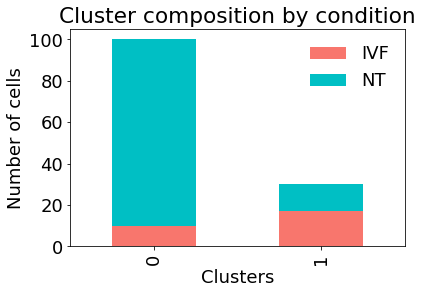

(None, <function matplotlib.pyplot.close(fig=None)>)

In [17]:
%get ucols --from R

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib

# Bar plot for the sub clustering of cluster 9
isnt_9=pd.DataFrame(data={'IVF':[10,17],'NT': [90,13]})

fig = plt.figure()
ax=isnt_9.plot(kind='bar', stacked=True,
              color=ucols)
ax.legend(labels=['IVF', 'NT'],bbox_to_anchor=(1,1),frameon=False)
ax.set_xlabel('Clusters')
ax.set_ylabel('Number of cells')
ax.set_title('Cluster composition by condition')
#plt.savefig('bar_clus_batch.pdf',bbox_inches='tight')
plt.show(),plt.close

# Chi-square test for IVF/NT dependence of cluster composition

In [18]:
#Define cluster composition by condition as a contingency table
cont.table <- isnt <- as.data.frame.matrix(table(Idents(xenopus.combined), xenopus.combined$isnt))


Attaching package: ‘gplots’


The following object is masked from ‘package:stats’:

    lowess




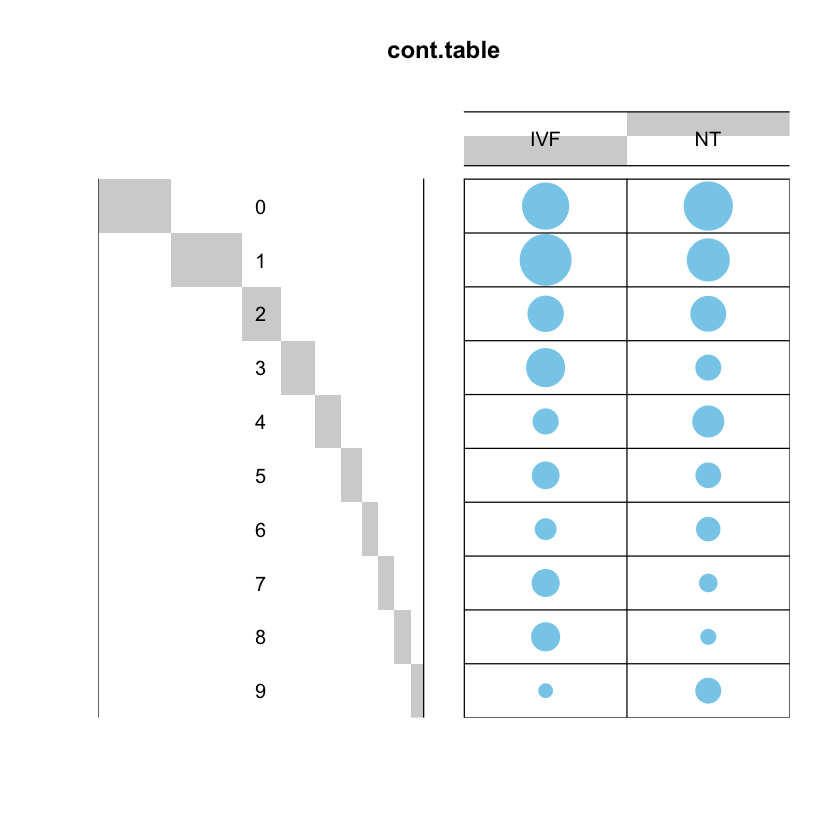

In [19]:
library("gplots")

# Contingency table can be visualized using the function balloonplot(). 
# This function draws a graphical matrix where each cell contains a dot 
# whose size reflects the relative magnitude of the corresponding component.

# 1. convert the data as a table
dt <- as.table(as.matrix(cont.table))
# 2. Graph
balloonplot(t(dt), main ="cont.table", xlab ="", ylab="",
            label = FALSE, show.margins = FALSE)

In [20]:
# Chi-square test: test if rows and columns are statistically associated
# in this case they are

chisq <- chisq.test(cont.table)
chisq


	Pearson's Chi-squared test

data:  cont.table
X-squared = 196.64, df = 9, p-value < 2.2e-16


In [21]:
# Observed counts
chisq$observed

# Expected counts
round(chisq$expected,2)

,IVF,NT
0,358,390
1,435,297
2,209,203
3,243,104
4,105,161
5,119,101
6,72,91
7,122,51
8,132,37
9,31,103


,IVF,NT
0,406.02,341.98
1,397.33,334.67
2,223.64,188.36
3,188.35,158.65
4,144.39,121.61
5,119.42,100.58
6,88.48,74.52
7,93.91,79.09
8,91.73,77.27
9,72.74,61.26


In [22]:
# Check the contribution of each cell
# Standardised residuals for each cell
round(chisq$residuals, 3)

,IVF,NT
0,-2.383,2.597
1,1.890,-2.059
2,-0.979,1.066
3,3.982,-4.339
4,-3.278,3.572
5,-0.038,0.042
6,-1.752,1.909
7,2.899,-3.159
8,4.204,-4.581
9,-4.894,5.332


corrplot 0.84 loaded



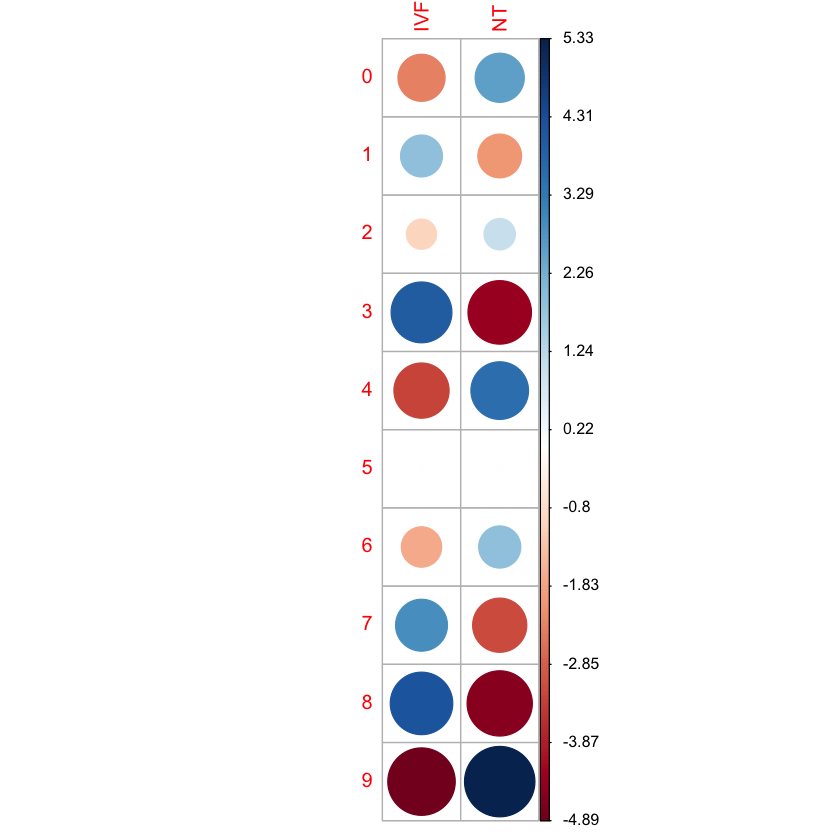

In [23]:
# Visualize the standardised residuals
library(corrplot)
corrplot(chisq$residuals, is.cor = FALSE,cl.align.text='l',cl.ratio=0.4)

,IVF,NT
0,2.888,3.429
1,1.816,2.156
2,0.487,0.578
3,8.062,9.572
4,5.464,6.487
5,0.001,0.001
6,1.561,1.853
7,4.274,5.075
8,8.988,10.671
9,12.179,14.459


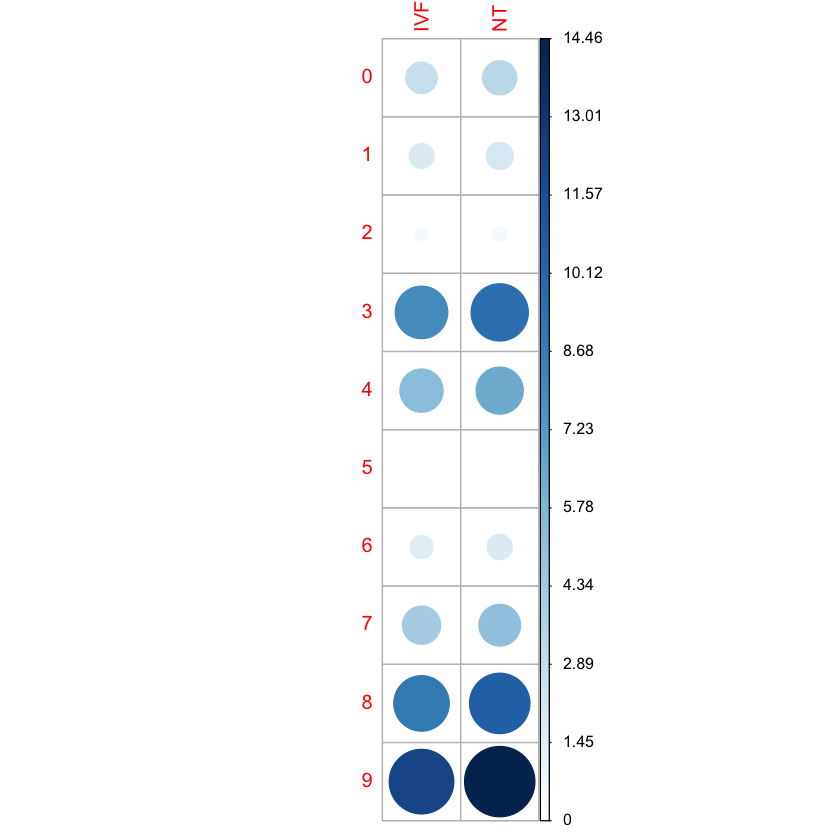

In [24]:
# contribution (in %) of a given cell to the total Chi-square score 
contrib <- 100*chisq$residuals^2/chisq$statistic
round(contrib, 3)

# Visualize the contribution
corrplot(contrib, is.cor = FALSE,cl.align.text='l',cl.ratio=0.4)

In [25]:
# Sort the contribution of each cell type according to the mean between IVF and NT
means <- rowMeans(contrib, na.rm=TRUE)
contrib <- contrib[order(means,decreasing=TRUE),]
round(contrib, 3)

,IVF,NT
9,12.179,14.459
8,8.988,10.671
3,8.062,9.572
4,5.464,6.487
7,4.274,5.075
0,2.888,3.429
1,1.816,2.156
6,1.561,1.853
2,0.487,0.578
5,0.001,0.001


In [26]:
res <- chisq$residuals
res[rownames(contrib),]

,IVF,NT
9,-4.89368858,5.33222599
8,4.20407158,-4.58081044
3,3.98174341,-4.33855881
4,-3.27780844,3.57154221
7,2.89918769,-3.15899218
0,-2.38308836,2.59664372
1,1.88960102,-2.05893357
6,-1.75175230,1.90873183
2,-0.97871394,1.06641929
5,-0.03819244,0.04161497


In [27]:
round(chisq$residuals[order(means,decreasing=TRUE),], 3)

,IVF,NT
9,-4.894,5.332
8,4.204,-4.581
3,3.982,-4.339
4,-3.278,3.572
7,2.899,-3.159
0,-2.383,2.597
1,1.890,-2.059
6,-1.752,1.909
2,-0.979,1.066
5,-0.038,0.042


# Repeat analysis per experiment

In [28]:
xenopus.list <- SplitObject(xenopus.combined, split.by = "orig.ident")

#Define Seurat objects with the two experiments
xenopus.combined.exp1 <- merge(xenopus.list$SIGAA2, y = xenopus.list$SIGAB2)
xenopus.combined.exp2 <- merge(xenopus.list$SIGAH5, y = xenopus.list$SIGAH12)

## Experiment 1

In [29]:
#Define cluster composition by condition as a contingency table
cont.table <- isnt <- as.data.frame.matrix(table(Idents(xenopus.combined.exp1), xenopus.combined.exp1$isnt))

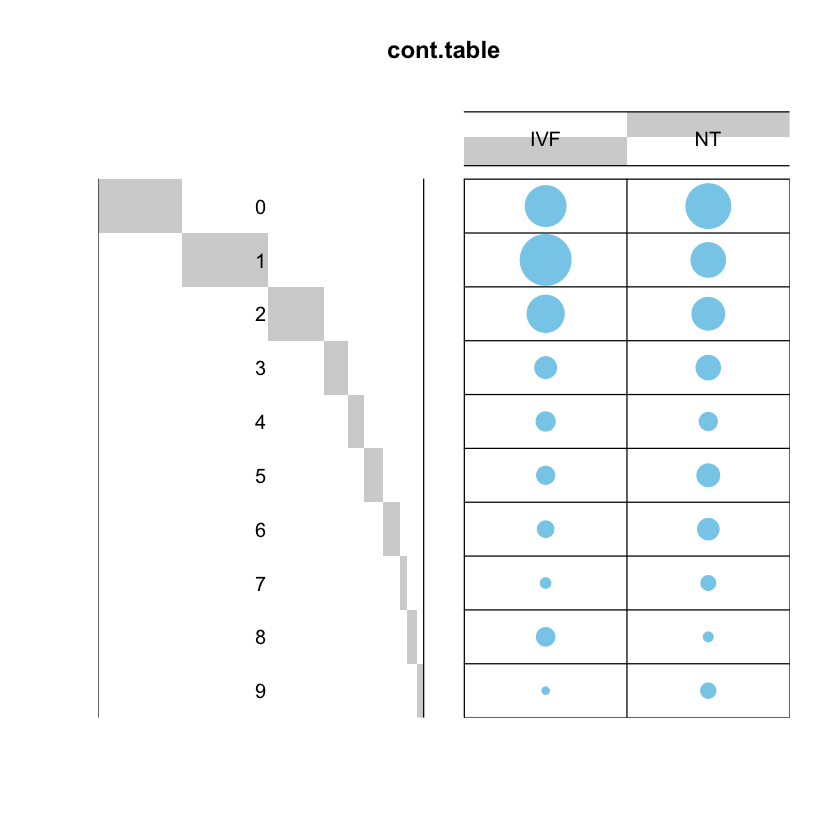

In [30]:
library("gplots")

# Contingency table can be visualized using the function balloonplot(). 
# This function draws a graphical matrix where each cell contains a dot 
# whose size reflects the relative magnitude of the corresponding component.

# 1. convert the data as a table
dt <- as.table(as.matrix(cont.table))
# 2. Graph
balloonplot(t(dt), main ="cont.table", xlab ="", ylab="",
            label = FALSE, show.margins = FALSE)

In [31]:
# Chi-square test: test if rows and columns are statistically associated
# in this case they are

chisq <- chisq.test(cont.table)
chisq


	Pearson's Chi-squared test

data:  cont.table
X-squared = 68.452, df = 9, p-value = 3.06e-11


In [32]:
# Observed counts
chisq$observed

# Expected counts
round(chisq$expected,2)

,IVF,NT
0,123,148
1,191,88
2,102,79
3,35,44
4,27,24
5,24,38
6,20,34
7,8,16
8,25,7
9,4,17


,IVF,NT
0,143.73,127.27
1,147.97,131.03
2,96.00,85.00
3,41.90,37.10
4,27.05,23.95
5,32.88,29.12
6,28.64,25.36
7,12.73,11.27
8,16.97,15.03
9,11.14,9.86


In [33]:
# Check the contribution of each cell
# Standardised residuals for each cell
round(chisq$residuals, 3)

,IVF,NT
0,-1.729,1.837
1,3.537,-3.759
2,0.613,-0.651
3,-1.066,1.133
4,-0.009,0.010
5,-1.549,1.646
6,-1.614,1.716
7,-1.325,1.408
8,1.949,-2.071
9,-2.139,2.273


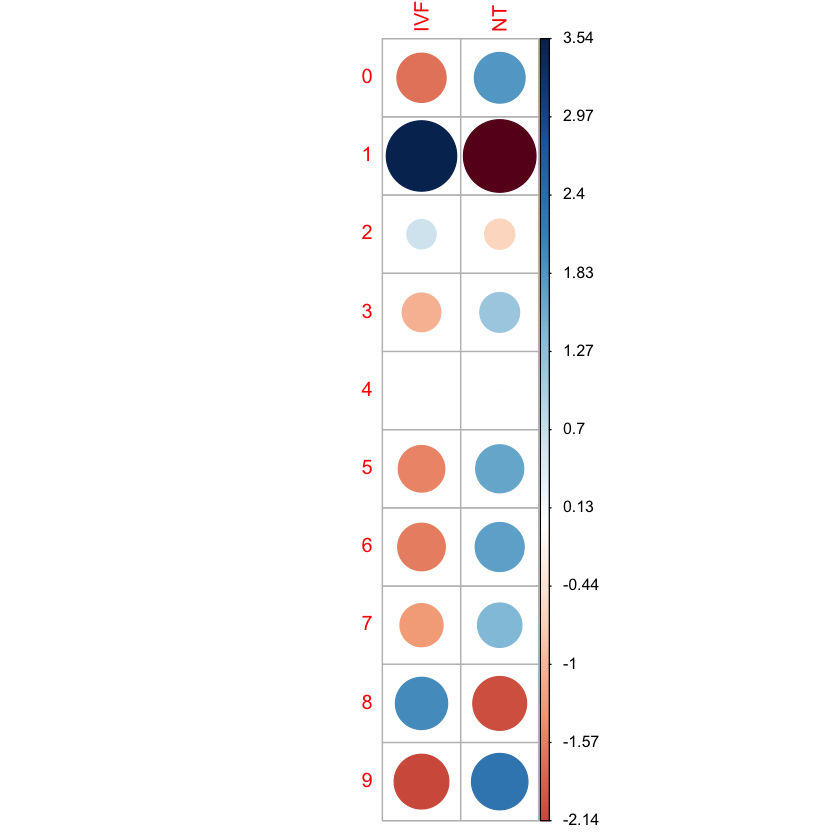

In [34]:
# Visualize the standardised residuals
library(corrplot)
corrplot(chisq$residuals, is.cor = FALSE,cl.align.text='l',cl.ratio=0.4)

,IVF,NT
0,4.367,4.932
1,18.280,20.643
2,0.549,0.620
3,1.659,1.874
4,0.000,0.000
5,3.505,3.958
6,3.807,4.300
7,2.566,2.898
8,5.548,6.266
9,6.682,7.546


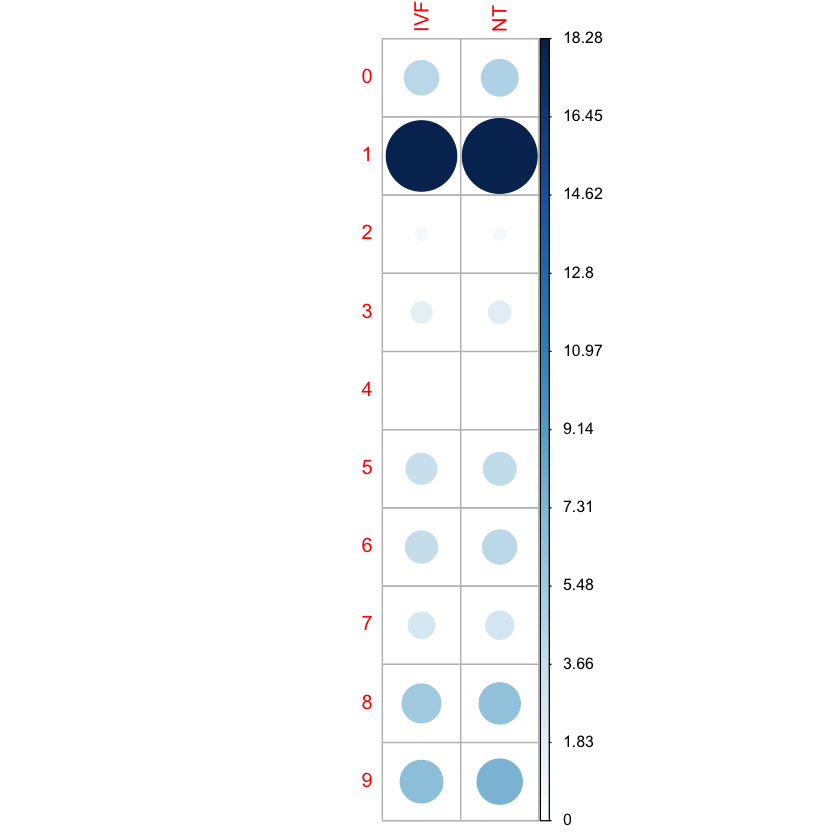

In [35]:
# contribution (in %) of a given cell to the total Chi-square score 
contrib <- 100*chisq$residuals^2/chisq$statistic
round(contrib, 3)

# Visualize the contribution
corrplot(contrib, is.cor = FALSE,cl.align.text='l',cl.ratio=0.4)

## Experiment 2

In [36]:
#Define cluster composition by condition as a contingency table
cont.table <- isnt <- as.data.frame.matrix(table(Idents(xenopus.combined.exp2), xenopus.combined.exp2$isnt))

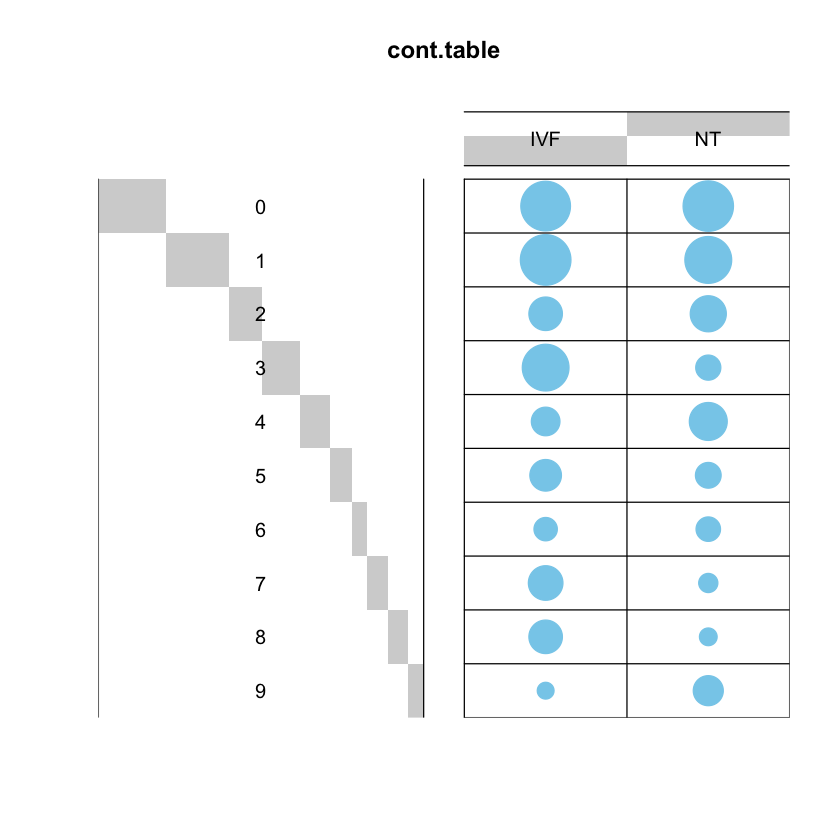

In [37]:
library("gplots")

# Contingency table can be visualized using the function balloonplot(). 
# This function draws a graphical matrix where each cell contains a dot 
# whose size reflects the relative magnitude of the corresponding component.

# 1. convert the data as a table
dt <- as.table(as.matrix(cont.table))
# 2. Graph
balloonplot(t(dt), main ="cont.table", xlab ="", ylab="",
            label = FALSE, show.margins = FALSE)

In [38]:
# Chi-square test: test if rows and columns are statistically associated
# in this case they are

chisq <- chisq.test(cont.table)
chisq


	Pearson's Chi-squared test

data:  cont.table
X-squared = 204.86, df = 9, p-value < 2.2e-16


In [39]:
# Observed counts
chisq$observed

# Expected counts
round(chisq$expected,2)

,IVF,NT
0,235,242
1,244,209
2,107,124
3,208,60
4,78,137
5,95,63
6,52,57
7,114,35
8,107,30
9,27,86


,IVF,NT
0,261.63,215.37
1,248.46,204.54
2,126.70,104.30
3,146.99,121.01
4,117.92,97.08
5,86.66,71.34
6,59.78,49.22
7,81.72,67.28
8,75.14,61.86
9,61.98,51.02


In [40]:
# Check the contribution of each cell
# Standardised residuals for each cell
round(chisq$residuals, 3)

,IVF,NT
0,-1.646,1.814
1,-0.283,0.312
2,-1.750,1.929
3,5.032,-5.546
4,-3.677,4.052
5,0.896,-0.987
6,-1.007,1.110
7,3.570,-3.935
8,3.675,-4.051
9,-4.443,4.897


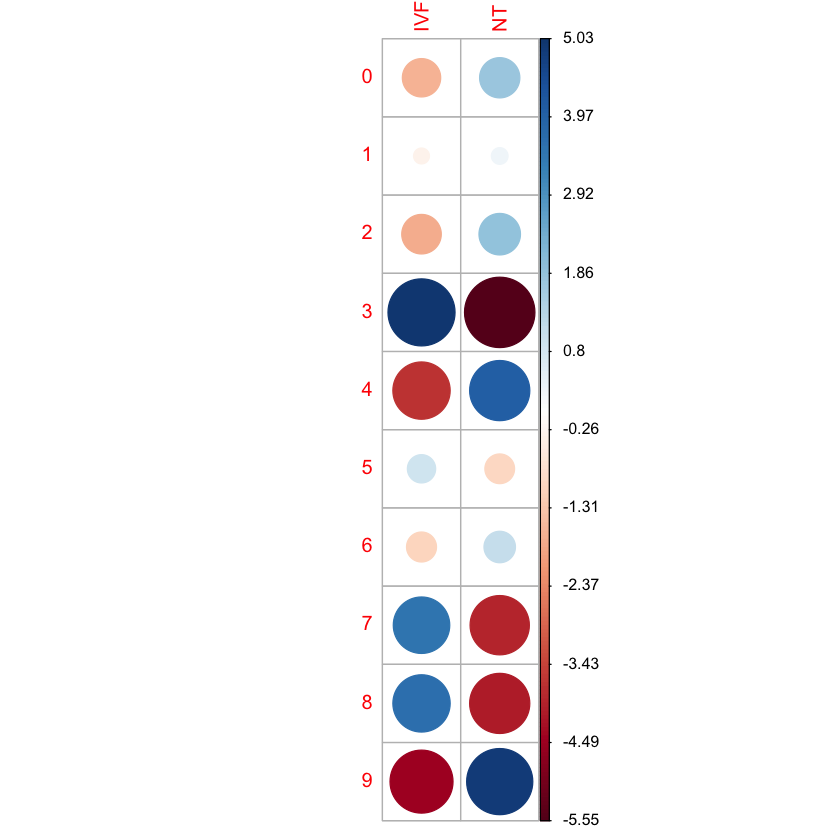

In [41]:
# Visualize the standardised residuals
library(corrplot)
corrplot(chisq$residuals, is.cor = FALSE,cl.align.text='l',cl.ratio=0.4)

,IVF,NT
0,1.323,1.607
1,0.039,0.048
2,1.495,1.816
3,12.359,15.013
4,6.598,8.015
5,0.392,0.476
6,0.495,0.601
7,6.222,7.558
8,6.593,8.009
9,9.636,11.706


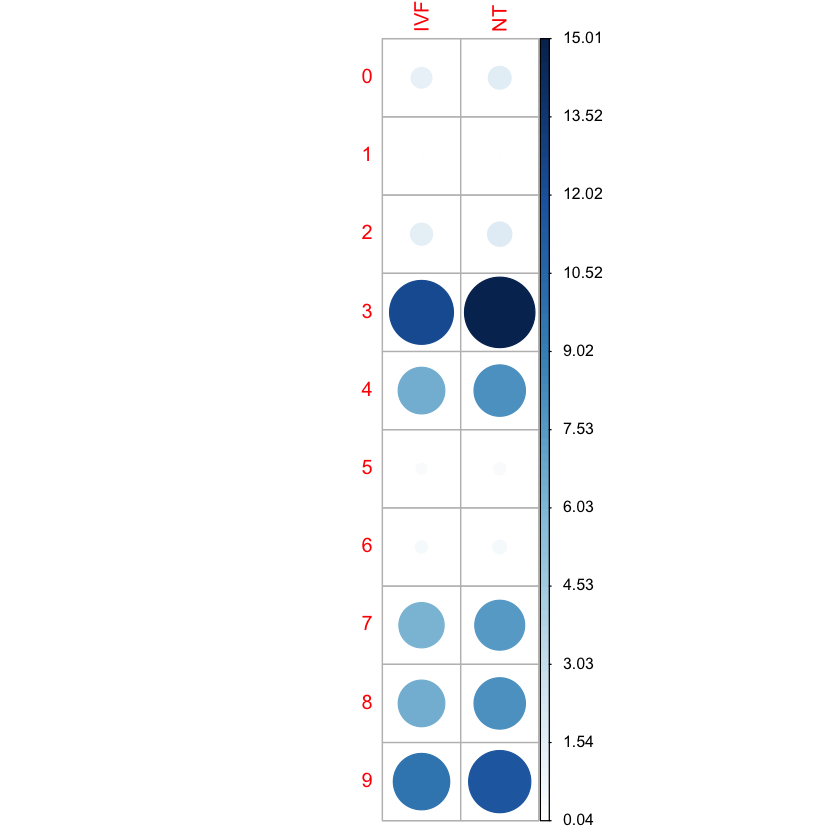

In [42]:
# contribution (in %) of a given cell to the total Chi-square score 
contrib <- 100*chisq$residuals^2/chisq$statistic
round(contrib, 3)

# Visualize the contribution
corrplot(contrib, is.cor = FALSE,cl.align.text='l',cl.ratio=0.4)

# Cell type composition analysis using glm

17/11/2020 This is the 'official' analysis. 

We follow the procedure described in the methods section in [Haber et al, 2017](https://www.nature.com/articles/nature24489), to assess significant changes in cell type proportions between IVF and NT samples.

The procedure is the following:

1. We model the detected number of each cell type in each condition (IVF/NT) as a Poisson random count variable

2. The rate of detection is modelled providing the total number of cells in a given condition as an offset variable, with the condition (IVF/NT) provided as a covariate.

3. We fit the model using glm from stats.

4. The p-value for the significance of the effect of cell type composition change between IVF and NT is obtained through a Wald test on the regression coefficient

In [43]:
library(Seurat)
library(ggplot2)
library(cowplot)
library(mdscore)
#Load the data
xenopus.combined <- readRDS(file = "xenopus_combined_and_clustered_no_out.rds")

Loading required package: MASS



In [44]:
# Define a dataframe with the number of cells for each batch
stim.df <- as.data.frame.matrix(table(Idents(xenopus.combined), xenopus.combined$stim))

# cond represents the condition of each batch
cond <- c('IVF','NT','NT','IVF')

# subj represents each batch
subj <- c('SIGAA2','SIGAB2','SIGAH12','SIGAH5')

# Total numebr of cells in each batch
sums <- c(sum(stim.df$SIGAA2),sum(stim.df$SIGAB2),sum(stim.df$SIGAH12),sum(stim.df$SIGAH5))

# Define a glm that will be fitted for each cell type: the condition is the covariate
# the total number of cells in each batch is the offset
# Perform a Wald test on the regression coefficient
My.glm <- function(x){
    data <- data.frame("cond" = cond, "cellCount" = x,
                "subject"=subj, "total" = sums, stringsAsFactors = FALSE)
    model <- glm(formula = cellCount ~ cond,
             family = poisson, data = data,
             offset = log(total))
    wald.test(model,term=2)$pvalue
}

# Apply the glm to each cell type (row of the dataframe stim.df)
pvals <-apply(stim.df, 1, My.glm)

# Adjust the p-values with fdr correction
pvals.adj <- p.adjust(pvals,method='fdr')

In [45]:
df <- data.frame('celltype'=c(0,1,2,3,4,5,6,7,8,9),'pvals.adj'= pvals.adj)

In [59]:
# p-value for each cluster ordered in increasing order
df[order(df$pvals.adj),]

,celltype,pvals.adj
,<dbl>,<dbl>
9,9,2.095263e-10
8,8,1.662555e-08
3,3,2.523213e-08
4,4,4.471847e-06
7,7,5.308253e-05
0,0,7.336451e-04
1,1,7.541938e-03
6,6,1.260127e-02
2,2,1.645685e-01


In [62]:
df_2 <- df[order(df$pvals.adj),]

In [63]:
df_2$cell_type <- c('Mixed characteristics','Basal stem cells II','Basal stem cells I',
                   'Cement gland primordium','Ciliated epidermal progenitors',
                   'Non-neural ectoderm','Goblet cells I','Chordal neural plate',
                   'Goblet cells II','Eye primordium/anterior neural plate')

In [66]:
df_2 <- df_2[,c('cell_type','pvals.adj')]
colnames(df_2) <- c('Cell type','FDR')
df_2

,Cell type,FDR
,<chr>,<dbl>
9,Mixed characteristics,2.095263e-10
8,Basal stem cells II,1.662555e-08
3,Basal stem cells I,2.523213e-08
4,Cement gland primordium,4.471847e-06
7,Ciliated epidermal progenitors,5.308253e-05
0,Non-neural ectoderm,7.336451e-04
1,Goblet cells I,7.541938e-03
6,Chordal neural plate,1.260127e-02
2,Goblet cells II,1.645685e-01


In [48]:
# Define the data for the representation of the results

# From the complete metadata keep only infos about batch, condition and cell type for each cell
meta.data <- xenopus.combined[[]]
meta.data <- meta.data[,c("stim","isnt","seurat_clusters")]

# Aggregate the data for each cell type, keeping the separation between batches
my.data <- aggregate(meta.data$seurat_clusters, by=list(meta.data$stim,meta.data$isnt,
                                            meta.data$seurat_clusters), FUN=length)

colnames(my.data) <- c('batch','condition','cell_type','cell_count')

# Rescale the data for each batch to obtain the frequency of each cell type in each batch
my.data[my.data$batch=='SIGAA2',]$cell_count <- my.data[my.data$batch=='SIGAA2',]$cell_count/sum(my.data[my.data$batch=='SIGAA2',]$cell_count) 
my.data[my.data$batch=='SIGAB2',]$cell_count <- my.data[my.data$batch=='SIGAB2',]$cell_count/sum(my.data[my.data$batch=='SIGAB2',]$cell_count) 
my.data[my.data$batch=='SIGAH5',]$cell_count <- my.data[my.data$batch=='SIGAH5',]$cell_count/sum(my.data[my.data$batch=='SIGAH5',]$cell_count) 
my.data[my.data$batch=='SIGAH12',]$cell_count <- my.data[my.data$batch=='SIGAH12',]$cell_count/sum(my.data[my.data$batch=='SIGAH12',]$cell_count) 

Loading required package: plotrix


Attaching package: ‘plotrix’


The following object is masked from ‘package:gplots’:

    plotCI


Loading required package: ggsignif



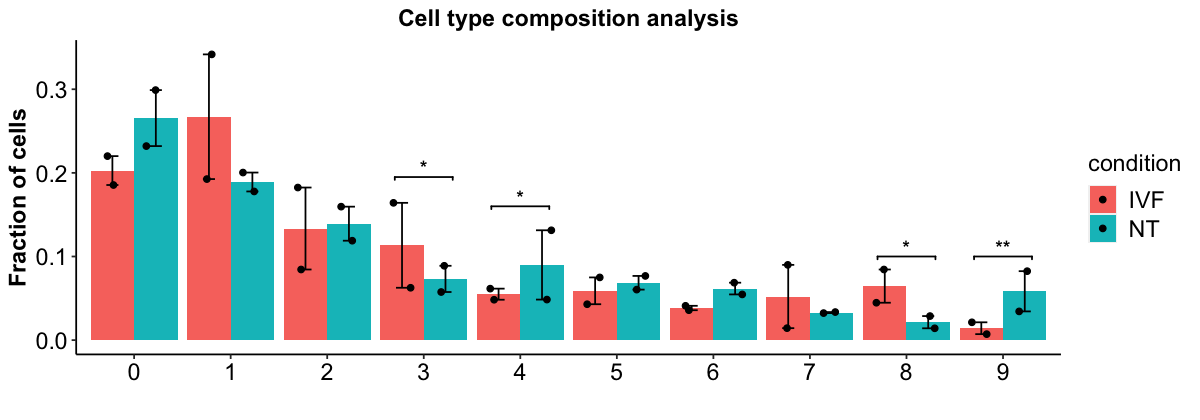

In [49]:
require(plotrix)
require(ggsignif)
# Bar plot of the fraction of cells in each batch (black dots)
# Each bar represents the mean fraction of cells in a given type for the batches of one condition
# The error bar is given by the s.e.m.
# The significance of the adjusted p-value is marked as * is FDR < 10^{-5}, ** if <10^{-9}
agg=aggregate(cell_count~cell_type*condition, data=my.data, FUN="mean") #mean
agg$sem=aggregate(cell_count~cell_type*condition, data=my.data, FUN="std.error")$cell_count #add the SD 


dodge <- position_dodge(width=0.9) 
limits <- aes(ymax=cell_count+sem, ymin=cell_count-sem) #Set up the error bars

options(repr.plot.width=10,repr.plot.height=3.5)

p <- ggplot(agg, aes(fill=condition, y=cell_count, x=cell_type)) 

p+geom_bar(position=dodge, stat="identity") + theme(
            legend.title=element_text(size=14), 
            legend.text=element_text(size=14),
            axis.text.x = element_text(color="black", 
                           size=14),
            axis.text.y = element_text(color="black", 
                           size=14),
            panel.grid.major = element_blank(), 
            panel.grid.minor = element_blank(),
            panel.background = element_blank(), axis.line = element_line(colour = "black"),
            plot.title = element_text(color="black", size=14, face="bold",hjust = 0.5),
            axis.title.x = element_text(color="black", size=14, face="bold"),
            axis.title.y = element_text(color="black", size=14, face="bold")
) + labs(title="Cell type composition analysis",
        x ="", y = "Fraction of cells") +
      geom_errorbar(limits, position=dodge, width=0.25)+
#       geom_point(data=my.data,aes(cell_type,cell_count,color=condition),
#                  position=dodge)+
       geom_jitter(data=my.data,aes(cell_type,cell_count,color=condition),
                  position = position_jitterdodge(jitter.width = 0.2, dodge.width = 0.9)) +
      scale_color_manual(values=c("black","black")) + geom_signif(y_position=c(0.195, 0.16,0.1,0.1), 
                xmin=c(3.7, 4.7,8.7,9.7), xmax=c(4.3, 5.3, 9.3, 10.3),
              annotation=c("*", "*", "*", "**"), tip_length=0.01, fontface="bold")

Second plot: Plot the ratio of relative cell abundance (NT/IVF) for each cell type. Order clusters by layer. 

In [50]:
agg.IVF <- agg[agg$condition=='IVF',]
agg.NT <- agg[agg$condition=='NT',]

In [51]:
require(scales)

# Create vector of default ggplot2 colors
my_color_palette <- hue_pal()(length(rownames(agg.IVF))+1)[1:10]
my_color_palette

Loading required package: scales


Attaching package: ‘scales’


The following object is masked from ‘package:plotrix’:

    rescale




[1] "#F8766D" "#DB8E00" "#AEA200" "#64B200" "#00BD5C" "#00C1A7" "#00BADE"
 [8] "#00A6FF" "#B385FF" "#EF67EB"

In [52]:
agg.ratio <- data.frame("cell_type"=agg.IVF$cell_type,
                        "ratio"= agg.NT$cell_count/agg.IVF$cell_count,
                        "colors"=my_color_palette,
                        stringAsFactor=TRUE)

rownames(agg.ratio) <- agg.ratio$cell_type



In [53]:
agg.ratio$cell_type <- factor(agg.ratio$cell_type,
                              levels = c("1","2","4","5","6","0","3","8","9","7"))

agg.ratio <- agg.ratio[c("1","2","4","5","6","0","3","8","9","7"),]
agg.ratio$colors <- factor(agg.ratio$colors,
                              levels = agg.ratio$colors)
agg.ratio$cell_names <- c("Goblet cells I",
                         "Goblet cells II",
                         "Cement gland primordium",
                         "Eye primordium/anterior neural plate",
                         "Chordal Neural plate",
                         "Non-neural ectoderm",
                         "Basal stem cells I",
                         "Basal stem cells II",
                         "Mixed characteristics",
                         "Ciliated epidermal progenitors")

agg.ratio$cell_names <- factor(agg.ratio$cell_names,
                              levels = agg.ratio$cell_names)

In [56]:
library(desiderata)

options(repr.plot.width=10,repr.plot.height=10)
pdf(file = "/Users/jonathan/Desktop/MUNCHEN/Project_Xenopus/PLOTS/cell_type_composition.pdf",width=10,height=10)
p <- ggplot(agg.ratio, aes(order=cell_names, y=ratio, x=cell_names)) 

p + geom_bar(
    position=dodge, stat="identity", show.legend = FALSE, aes(fill=cell_names)) +
  scale_fill_manual(values = as.vector(agg.ratio$colors)) + theme(
            axis.text.x = element_text(color="black", vjust=0.6,
                           size=16,angle=45),
            axis.text.y = element_text(color="black", 
                           size=16),
            panel.grid.major = element_blank(), 
            panel.grid.minor = element_blank(),
            panel.background = element_blank(), axis.line = element_line(colour = "black"),
            plot.title = element_text(color="black", size=14, face="bold",hjust = 0.5),
            axis.title.x = element_text(color="black", size=14, face="bold"),
            axis.title.y = element_text(color="black", size=16, face="bold")
) + labs(title="",
        x ="", y = "Ratio of mean fraction of cells per condition (NT/IVF)") + rotate_x_text(angle=-90,valign=0.5) + geom_text(
      aes(label=c("","","*","","","","*","*","**",'')),
      size=9, position=position_dodge(width=0.9), vjust=-0.01) +geom_hline(
      yintercept=1, linetype='dashed', color='black', size=1)
dev.off()

pdf 
  2

In [58]:
sessionInfo()

R version 3.5.2 (2018-12-20)
Platform: x86_64-apple-darwin15.6.0 (64-bit)
Running under: macOS Mojave 10.14.6

Matrix products: default
BLAS: /Library/Frameworks/R.framework/Versions/3.5/Resources/lib/libRblas.0.dylib
LAPACK: /Library/Frameworks/R.framework/Versions/3.5/Resources/lib/libRlapack.dylib

locale:
[1] C/UTF-8/C/C/C/C

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
 [1] desiderata_0.38.0 scales_1.1.1      ggsignif_0.6.0    plotrix_3.7-8    
 [5] mdscore_0.1-3     MASS_7.3-53       corrplot_0.84     gplots_3.1.1     
 [9] feather_0.3.5     repr_1.1.0        cowplot_1.1.0     ggplot2_3.3.2    
[13] Seurat_3.1.4     

loaded via a namespace (and not attached):
  [1] TH.data_1.0-10      Rtsne_0.15          colorspace_2.0-0   
  [4] ellipsis_0.3.1      ggridges_0.5.2      IRdisplay_0.7.0    
  [7] base64enc_0.1-3     leiden_0.3.5        listenv_0.8.0      
 [10] farver_2.0.3        ggrepel_0.8.2       mv